In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Cargar archivos de datos
reno_data = pd.read_table('reno_data_for_unified_analysis.dat',names=['s2','dm','ji'], delim_whitespace=True)
db_data = pd.read_table('db_data.dat',names=['s2','dm','ji'], delim_whitespace=True)

data_cl68 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl68.dat", names=['s2','dm'], delim_whitespace=True)
data_cl95 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl95.dat", names=['s2','dm'], delim_whitespace=True)
data_cl99 = pd.read_table("../daya_for_global_analysis/db_data/db2018_cl99.dat", names=['s2','dm'], delim_whitespace=True)

In [45]:
rn_data_cl68 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl68.csv', delim_whitespace=True)
rn_data_cl95 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl95.csv', delim_whitespace=True)
rn_data_cl99 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl99.csv', delim_whitespace=True)

In [30]:
data= reno_data
data['ji']=reno_data['ji']+db_data['ji']
data

,s2,dm,ji
0,0.072048,0.002201,236.150132
1,0.072097,0.002201,235.929524
2,0.072145,0.002201,235.709542
3,0.072193,0.002201,235.490185
4,0.072242,0.002201,235.271453
...,...,...,...
249995,0.097778,0.002800,206.813690
249996,0.097833,0.002800,207.027210
249997,0.097889,0.002800,207.241549
249998,0.097944,0.002800,207.456706


In [31]:
# Obtención del ji minímo de los datos y sus correspondientes parámetros de oscilación

s2_min = data.iloc[data['ji'].idxmin()][0]
dm_min = data.iloc[data['ji'].idxmin()][1]
ji_min = data.iloc[data['ji'].idxmin()][2]
s2_min, dm_min, ji_min

(0.08616573460953032, 0.0025588, 164.81878316725056)

In [32]:
# Restando el ji_min a la columna de ji
data['ji']=data['ji']-ji_min
data['ji'].min()

0.0

In [33]:
# Filtrando datos por nivel de confianza

data_68=data[(data['ji'] <=  2.30) & (data['ji'] >=  2.25)][['s2','dm']]
data_95=data[(data['ji'] <=  6.18) & (data['ji'] >=  6.10)][['s2','dm']]
data_99=data[(data['ji'] <= 11.83) & (data['ji'] >= 11.71)][['s2','dm']]

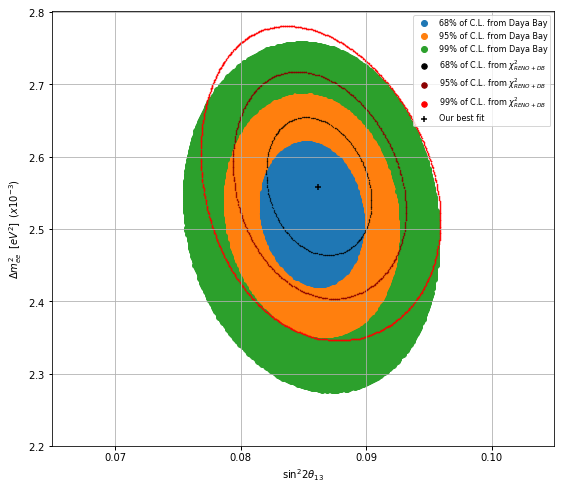

In [34]:
# Graficando datos en regiones de confianza

fig,ax=plt.subplots(figsize=(9, 8))
ax.scatter(data_cl68['s2'].to_numpy(),data_cl68['dm'].to_numpy(),label='68% of C.L. from Daya Bay')
ax.scatter(data_cl95['s2'].to_numpy(),data_cl95['dm'].to_numpy(),label='95% of C.L. from Daya Bay')
ax.scatter(data_cl99['s2'].to_numpy(),data_cl99['dm'].to_numpy(),label='99% of C.L. from Daya Bay')
ax.scatter(  data_68['s2'].to_numpy(),  data_68['dm'].to_numpy(),s=0.1,c='black',  label=r'68% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(  data_95['s2'].to_numpy(),  data_95['dm'].to_numpy(),s=0.2,c='darkred',label= '95% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(  data_99['s2'].to_numpy(),  data_99['dm'].to_numpy(),s=0.3,c='red',    label= '99% of C.L. from $\chi^2_{RENO+DB}$')
ax.scatter(s2_min,dm_min,c='black',marker='+' ,label='Our best fit')
# Limites en los ejes
ax.set_xlim(0.065, 0.105)
ax.set_ylim(00.0022, 0.002801)

ax.set_xticks([0.07,0.08,0.09,0.1])
ax.set_yticks([0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028])

ax.set_yticklabels(['$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$'])

lgnd=ax.legend()

# Plot legend.
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=8)
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$')
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=10, width=1)
#fig.savefig("db_confidence_region_cov.eps")
#plt.show()

# Perfil ( $\Delta \chi^2$, $\sin^2 2\theta_{13}$)

In [73]:
# Obtención de datos para el perfil
s2_profile=data[data['dm']==dm_min][['s2','ji']]
parabol_s2=pd.read_table("../daya_for_global_analysis/db_data/db_profile_s2.dat", names=['s2','ji'], delim_whitespace=True)
parabol_s2['ji']=parabol_s2['ji']-parabol_s2['ji'].min()

In [74]:
# Datos del análisis de RENO
rn_parabol_s2 = pd.read_table('parabol_s2_reno.dat', names=['s2','ji'],delim_whitespace=True)
ji_min_s2=rn_parabol_s2['ji'].min()
rn_parabol_s2['ji']=rn_parabol_s2['ji']-ji_min_s2

In [75]:
s2_profile.to_csv('unified_profile_ji_s2_from_python.csv')

[Text(0, 0.5, '$\\Delta \\chi^2$'), Text(0.5, 0, '$\\sin^2 2\\theta_{13}$')]

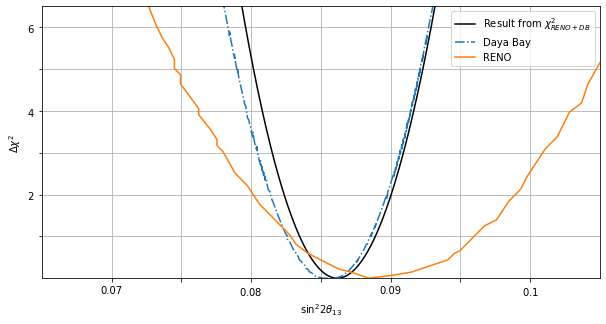

In [76]:
# Gráfica de (  Δ𝜒2 ,  sin22𝜃13 )
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(s2_profile['s2'].to_numpy(),s2_profile['ji'].to_numpy(),c='black',linestyle='-',label=r'Result from $\chi^2_{RENO+DB}$')
ax.plot(parabol_s2['s2'].to_numpy(),parabol_s2['ji'].to_numpy(),linestyle='-.',label=r'Daya Bay')
ax.plot(rn_parabol_s2['s2'].to_numpy(),rn_parabol_s2['ji'].to_numpy(),linestyle='-',label=r'RENO')


ax.legend()
ax.set_xlim(0.065, 0.105)
#ax.set_xlim(0.0, 0.2)
ax.set_ylim(0.0, 6.5)
ax.grid(True, linestyle='-')

ax.set_xticks([0.07,0.075,0.08,0.085,0.09,0.095,0.1])
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['0.07','','$0.08$','','0.09','','$0.1$'])
#ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])


#ax.set_xticks([0,0.05,0.1,0.15,0.2])
ax.set_yticks([1,2,3,4,5,6])
#ax.set_xticklabels(['0','$0.05$','0.10','$0.15$','0.2'])
ax.set_yticklabels(['','$2$','','$4$','','$6$',''])


ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta \chi^2$')
#fig.savefig("unified_parabol_s22t13_cov.eps")

In [77]:
s2_left=0.08348284536
s2_right=0.08891360637179181

s2_sigma_left  = s2_min   - s2_left
s2_sigma_right = s2_right - s2_min

(s2_sigma_left,s2_sigma_right)

(0.002682889249530321, 0.002747871762261489)

In [78]:
# En Daya Bay (0.0030568978958679244, 0.002886573999224068)

# Perfil( $\Delta \chi^2$, $\Delta m^2_{ee}$)

In [79]:
# Obtención de datos para el perfil
dm_profile=data[data['s2']==s2_min][['dm','ji']]
parabol_dmee=pd.read_table('../daya_for_global_analysis/db_data/db_profile_dm.dat',names=['dm','ji'],delim_whitespace=True)

In [80]:
dm_profile.to_csv('unified_profile_ji_dm_from_python.csv')

In [81]:
# Datos del análisis de RENO

rn_parabol_dmee = pd.read_table('parabol_dmee_reno.dat', names=['dm','ji'],delim_whitespace=True)
ji_min_dm=rn_parabol_dmee['ji'].min()
rn_parabol_dmee['ji']=rn_parabol_dmee['ji']-ji_min_dm

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


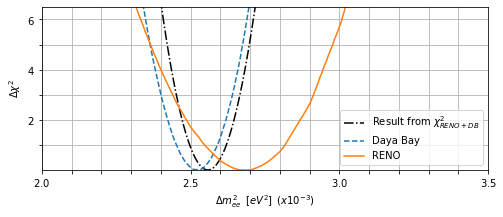

In [82]:
#Gráfica
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(dm_profile['dm'],dm_profile['ji'],c='black',linestyle='-.',label=r'Result from $\chi^2_{RENO+DB}$')
ax.plot(parabol_dmee['dm'].to_numpy(),parabol_dmee['ji'].to_numpy(),linestyle='--',label=r'Daya Bay')
ax.plot(rn_parabol_dmee['dm'].to_numpy(),rn_parabol_dmee['ji'].to_numpy(),linestyle='-',label=r'RENO')


ax.legend()
#ax.set_xlim(0.00215, 0.00285)  # From Daya Bay
#ax.set_ylim(0.0, 10)           # From Daya Bay

ax.set_xlim(0.002, 0.0035)       # From RENO
ax.set_ylim(0.0, 6.5)           # From RENO
ax.grid(True, linestyle='-')

#ax.set_xticks([0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028])
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10])
#ax.set_xticklabels(['$2.2$','$2.3$','$2.4$','$2.5$','$2.6$','$2.7$','$2.8$'])
#ax.set_yticklabels(['','$2$','','$4$','','$6$','','$8$','','$10$'])



ax.set_xticks([0.002,0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029,0.003,0.0031,0.0032,0.0033,0.0034,0.0035,])
ax.set_yticks([1,2,3,4,5,6])
ax.set_xticklabels(['$2.0$','','','','','$2.5$','','','','','$3.0$','','','','','$3.5$'])
ax.set_yticklabels(['','$2$','','$4$','','$6$',''])

ax.set(xlabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$', ylabel=r'$\Delta \chi^2 $')
fig.savefig("unified_parabol_dmee_cov.eps")

In [83]:
dm_left = 0.0024964
dm_right= 0.00262

dm_sigma_left=dm_min-dm_left
dm_sigma_right=dm_right-dm_min

(dm_sigma_left,dm_sigma_right)

(6.239999999999978e-05, 6.119999999999997e-05)

In [ ]:
#En Daya Bay (6.871071346441302e-05, 6.957583649534575e-05)